# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Павлов Даниил. Вариант №45.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Введем обозначения:
1. $\lambda(n) = [\log_{2}(n)]$ - уменьшенная на 1 длина бинарной записи n
2. $\nu(n)$ - вес Хэмминга для бинарной записи числа n(число единиц в бинарной записи)

Ниже приведены описание методов возведения в степень:
### Бинарный метод sx.

1. Находим $\lambda(n)$
2. Каждый элемент равный '1' заменяем на $SX$; в противной случае на $S$.
3. Проходим каждый элемент получившегося выражения, состоящего из $'S'$ и $'X'$. Если встречаем $S$ - возводим $result$ в квадрат, иначе умножаем на $x$. (на первой итерации $result = 1$)

Количество итераций: $\lambda(n) + \nu(n) - 1$

### Бинарный метод возведения в степень справа налево.

1. Инициализируем $N = n; Y = 1; Z = x$
2. Переход на пункт 3 если $N$ четно, иначе ну пункт 4.
3. $N /= 2; Z *= Z$; Переход на пункт 2
4. $N /= 2; Y *= Y$
5. Если $N == 0$ - возврат $Y$; иначе $Z *= Z$; Переход на пункт 2.

Количество итераций: $\lambda(n) + \nu(n)$

### Метод множителей.

1. Пусть $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. ${x^n}$ можно вычислить, посчитав ${x^p}$ и возведя это число в степень $q$
2. Если $n$ простое, вычислим $x^{n-1}$ и домножим его на $x$.
3. Если $n == 1$ - получаем ${x^n}$


### Дерево степеней

Корень дерева - 1. Для построения дерева берём каждый узел $i$ на $k$-м уровне слева направо и присоединяем узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$. Если узел уже есть в дереве, он не добавляется.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно про- интерпретировать.

## Выполнение работы

### Бинарный метод sx

Аргумент функции - целое число $n$. 

В начале функция проверяет, меньше ли $n$ единицы, и возвращает 1, если это так. 

Далее создается переменная $result$, которая является переменной символьного выражения $x$. 

Строка $binN = str(bin(n))[3:]$ преобразует число $n$ в двоичную систему счисления, затем удаляет первые два символа $0b$, оставляя только двоичное представление числа. 

Переменная $transformedToSX$ заменяет символ $0$ на символ $S$, а символ $1$ на символ $SX$ с помощью метода $replace()$. 

Далее в цикле $for$ по каждому символу в строке $transformedToSX$ вычисляется новое значение $result$. Если символ равен $S$, то $result$ возводится в степень $2$ оператором $"^"$.  Если символ равен $X$, то к $result$ умножается $x$ оператором $"*"$. 

В конце функция возвращает результат, который является конечным значением $result$. 

Кроме того, в функции есть дополнительная строка для вывода значения $result$ на каждой итерации цикла. Это может быть полезно при отладке кода.

Функция для проверки $\lambda(n) + \nu(n) - 1 =$ число итераций называется $Check()$.

In [1]:
def binary_method_sx(n):
    if n < 1:
        return 1
    result = var('x')
    
    binN = str(bin(n))[3:]
    transformedToSX = binN.replace('0', 'S').replace('1', 'SX')
    print(f"{n} => {binN} => {transformedToSX}")
    
    for i, char in enumerate(transformedToSX):
        if char == 'S':
            result ^= 2
        elif char == 'X':
            result *= x
        print(f"[Iteration {i}] {result}")
        iterations = i
    return transformedToSX, iterations, n

def check(operations, n, constant):
    print("\nChecking:")
    print(f"λ({n}) + v({n}) + ({constant}) == {operations} | Operations mark is good!" 
          if operations == (floor(log(n, 2)) + str(bin(n))[2:].count('1') + constant)
          else f"({floor(log(n, 2))}) + ({str(bin(n))[2:].count('1')}) + ({constant}) != {operations}")

In [2]:
result, iterations, n = binary_method_sx(12)

check(iterations + 1, n, -1) 

12 => 100 => SXSS
[Iteration 0] x^2
[Iteration 1] x^3
[Iteration 2] x^6
[Iteration 3] x^12

Checking:
λ(12) + v(12) + (-1) == 4 | Operations mark is good!


In [3]:
result, iterations, n = binary_method_sx(23)

check(iterations + 1, n, -1) 

23 => 0111 => SSXSXSX
[Iteration 0] x^2
[Iteration 1] x^4
[Iteration 2] x^5
[Iteration 3] x^10
[Iteration 4] x^11
[Iteration 5] x^22
[Iteration 6] x^23

Checking:
λ(23) + v(23) + (-1) == 7 | Operations mark is good!


In [4]:
result, iterations, n = binary_method_sx(34)

check(iterations + 1, n, -1) 

34 => 00010 => SSSSXS
[Iteration 0] x^2
[Iteration 1] x^4
[Iteration 2] x^8
[Iteration 3] x^16
[Iteration 4] x^17
[Iteration 5] x^34

Checking:
λ(34) + v(34) + (-1) == 6 | Operations mark is good!


#### Вывод
Мы реализовали метод $SX$ и проверили его работоспособность, а также оценили число операций, необходимых для его выполнения. Этот метод легок в понимании и реализации, и эффективно производит вычисление одночлена. Оценка позволяет легко определить, сколько итераций требуется для расчета (поскольку на каждой итерации выполняется только одна операция).

### 2. Метод возведения справа налево

Данная функция называется $RightLeftMethod$ метод и используется для возведения числа в $n$-ную степень. Она работает следующим образом:

1. На вход функции подается число $n$.
2. Создаются переменные: $N$, $Y$, $Z$, $iterations$, $operations$, где $N$ инициализируется значением $n$, $Y$ инициализируется значением 1, $Z$ - переменная символьной математики, $iterations$ и $operations$ - счетчики.
3. Выполняется цикл while True.
4. Если $N$ четное, то $N$ делится пополам, $Z$ возводится в квадрат, а счетчик $operations$ увеличивается.
5. Если $N$ нечетно, то $N$ делится пополам, $Y$ умножается на $Z$, а счетчик $operations$ увеличивается. Если после деления $N$ становится равным нулю, то цикл прерывается.
6. При каждой итерации цикла выполняется вывод значений переменных $iterations$, $N$, $Y$, $Z$, чтобы пользователь мог отслеживать работу функции.
7. По завершении работы цикла функция возвращает переменные $Y$, $iterations$, $n$ и $operations$.

Возвращаемые значения означают:

- $Y$ - результат возведения числа в $n$-ную степень;
- $iterations$ - количество итераций цикла, необходимых для выполнения операции возведения числа в $n$-ную степень;
- $n$ - исходное число;
- $operations$ - количество выполненных операций при возведении числа в $n$-ную степень.

In [5]:
def right_left_method(n):
    iterations = 0
    operations = 0
    N = n
    Y = 1
    Z = var('x')
    
    print("I\tN\tY\tZ")
    
    while True:
        print(f"{iterations}\t{N}\t{Y}\t{Z}")
        if N % 2 == 0:
            N = floor(N / 2)
            Z = Z * Z
            operations += 1
        else:
            N = floor(N / 2)
            Y = Z * Y
            operations += 1
            if (N == 0):
                iterations += 1
                break
            else:
                Z = Z * Z
                operations += 1
        iterations += 1
        
    print(f"{iterations}\t{N}\t{Y}\t{Z}")
    return Y, iterations, n, operations

Ниже представлены тесты для разных значений $n$.

In [6]:
result, iterations, n, operations = right_left_method(12)

check(operations, n, 0) 

I	N	Y	Z
0	12	1	x
1	6	1	x^2
2	3	1	x^4
3	1	x^4	x^8
4	0	x^12	x^8

Checking:
λ(12) + v(12) + (0) == 5 | Operations mark is good!


In [7]:
result, iterations, n, operations = right_left_method(23)

check(operations, n, 0) 

I	N	Y	Z
0	23	1	x
1	11	x	x^2
2	5	x^3	x^4
3	2	x^7	x^8
4	1	x^7	x^16
5	0	x^23	x^16

Checking:
λ(23) + v(23) + (0) == 8 | Operations mark is good!


In [8]:
result, iterations, n, operations = right_left_method(34)

check(operations, n, 0)

I	N	Y	Z
0	34	1	x
1	17	1	x^2
2	8	x^2	x^4
3	4	x^2	x^8
4	2	x^2	x^16
5	1	x^2	x^32
6	0	x^34	x^32

Checking:
λ(34) + v(34) + (0) == 7 | Operations mark is good!


#### Вывод
Таким образом, был реализован метод возведения числа в степень с использованием бинарного метода справа налево. Была проведена проверка его работоспособности и произведена оценка числа операций на основании теоретических данных. Данный метод является более сложным для понимания, чем метод возведения в степень по формуле $S^X$ и также требует на одну операцию больше, как было подтверждено на практике. Однако количество операций для данного метода можно легко вычислить используя формулу $\lambda(n) + \nu(n)$. В общем случае после завершения алгоритма переменная $Z$ будет равна $x^{2^{k-2}}$ , где $k$ - число выполненных итераций метода.

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Согласно полученной оценке, метод возведения числа в степень с использованием бинарного метода справа налево требует большего числа операций, чем метод $S^X$. Число итераций в методе справа налево можно оценить с помощью формулы $\lfloor log_{2}(n) \rfloor + 2$, в то время как число итераций в методе $S^X$ вычисляется по формуле $\lambda(n) + \nu(n) - 1$. Таким образом, метод $S^X$ является более выгодным, чем метод возведения справа налево с использованием бинарного метода.

### 4. Метод множителей

Выполним метод множителей вручную для $n= 12, n = 23, n = 34$ по алгоритму, приведённому в теоретическом положении.<br>

<mark>Для $n == 12$:</mark>

Разложим $n$ на простые множители: $12 = 2 * 2 * 3$.

Теперь мы можем вычислить $x^2$, а затем возвести его в степень 2 в первый раз, и возводить его в степень 3 второй раз:

1. Вычисляем $x^2$:
   <ol>
        <li>Перемножаем $x$ на само себя, чтобы получить $x^2$</li>
   </ol>
    
2. Возводим $x^2$ в степень 2:
   <ol>
        <li>Перемножаем $x^2$ само на себя, чтобы получить $x^4$</li>
   </ol>
    
3. Возводим $x^4$ в степень 3:
   <ol>
        <li>Перемножаем $x^4$ само на себя, чтобы получить $x^8$</li>
        <li>Перемножаем $x^8$ на $x^4$, чтобы получить $x^{12}$</li>
   </ol>

Таким образом, мы нашли $x^{12}$ за 3 операции перемножения. В результате, $x^{12} = x^{2  2  3} = x^2  x^2  x^8$.

<mark>Для $n == 23$:</mark>

Разложим n на простые множители: $23 = 23 * 1$.

Теперь мы можем вычислить $x^2$, а затем возвести его в степень 2 в первый раз, и возводить его в степень 3 второй раз:

1. Вычисляем $x^2$:
   <ol>
        <li>Перемножаем $x$ на само себя, чтобы получить $x^2$</li>
   </ol>
    
2. Возводим $x^2$ в степень 2:
   <ol>
        <li>Перемножаем $x^2$ само на себя, чтобы получить $x^4$</li>
   </ol>
    
3. Возводим $x^4$ в степень 3:
   <ol>
        <li>Перемножаем $x^4$ само на себя, чтобы получить $x^8$</li>
        <li>Перемножаем $x^8$ на $x^4$, чтобы получить $x^{12}$</li>
        <li>Перемножаем $x^{12}$ на $x^2$, чтобы получить $x^{14}$</li>
        <li>Перемножаем $x^{14}$ на $x^{2}$, чтобы получить $x^{16}$</li>
        <li>Перемножаем $x^{16}$ на $x^{2}$, чтобы получить $x^{18}$</li>
        <li>Перемножаем $x^{18}$ на $x^{2}$, чтобы получить $x^{20}$</li>
        <li>Перемножаем $x^{20}$ на $x^{2}$, чтобы получить $x^{22}$</li>
        <li>Перемножаем $x^{22}$ на $x^{1}$, чтобы получить $x^{23}$</li>
   </ol>

Таким образом, мы нашли $x^{23}$ за 8 операций перемножения. В результате, $x^{23} = x^{23}$. Более быстрых способов найти это значение нет, так как 23 - простое число и не раскладывается на простые множители.

<mark>Для $n == 34$:</mark>

Разложим $n$ на простые множители: $34 = 2 * 17$.

Теперь мы можем вычислить $x^2$, а затем возвести его в степень 17:

1. Вычисляем $x^2$:
    <ol>
        <li>Перемножаем $x$ на само себя, чтобы получить $x^2$</li>
    </ol>
    
2. Возводим $x^2$ в степень 17:
    <ol>
        <li>Вычисляем $x^4$ - это можно сделать за одну операцию, перемножив $x^2$ само на себя</li>
        <li>Вычисляем $x^8$ - это также можно сделать быстро, дважды возвести $x^4$ в квадрат</li>
        <li>Вычисляем $x^{16}$ - аналогично, возводим $x^8$ в квадрат</li>
        <li>Умножаем $x^{16}$ на $x^2$ - это дает $x^{18}$, затем умножаем $x^{18}$ на $x^2$ снова, чтобы получить $x^{20}$, затем на $x^2$ снова, чтобы получить $x^{22}$, и т.д., пока не получим $x^{34}$.</li>
    </ol>
    
Таким образом, мы нашли $x^{34}$ за 6 операций перемножения (1 для $x^2$ и 5 для $x^{34}$). В результате, $x^{34} = x^{2 * 17} = x^2 * x^{32}$.

#### Вывод
Итак, мы рассмотрели метод множителей для нескольких $n$. Этот метод имеет несколько преимуществ: он прост в понимании и легко можно посчитать количество операций для возведения числа в степень вручную. Кроме того, в некоторых случаях он может работать быстрее, чем бинарный метод, например, для $n=12$. 

Однако у метода множителей есть и недостатки, такие как сложность реализации (часто приходится применять рекурсию) и то, что он не всегда является самым быстрым методом.

### 5. Построение дерева степеней

Класс $PowerTree$ задает дерево степеней. 

Метод $init$ создает дерево степеней с корневой вершиной $1$ и количеством вершин, указанным в аргументе $n$. В процессе создания дерева используется алгоритм обхода в ширину, который строит дерево постепенно, начиная с корня и переходя к последующим уровням.

Метод $search\_path$ находит кратчайший путь от корня до заданной вершины дерева.

Метод $print\_tree$ выводит на экран изображение дерева с помощью графической библиотеки $SageMath$. 

Метод $compare\_with\_sx$ выполняет сравнение дерева степеней со стандартным алгоритмом для нахождения кратчайшего пути от вершины $1$ до вершины $n$, известного как алгоритм с помощью битовых масок $(Sx)$. Если длина кратчайшего пути от вершины $1$ до n в дереве степеней вместе с константой меньше, чем длина кратчайшего пути, найденного алгоритмом $Sx$, то выводится сообщение $"Tree is better than Sx"$, иначе выводится сообщение $"Sx is better than Tree"$.

In [9]:
import warnings


class PowerTree:
    def __init__(self, n):
        self.power = n
        self.tree = Graph()
        self.tree.add_vertex(1)
        
        self._generate_tree()
            
    def _generate_tree(self):
        numberFound = False
        
        previousVertices = [1]
        while numberFound == False:
            currentVertices = []
            
            for item in previousVertices:
                path = self.tree.shortest_path(1, item)
                
                for vert in path:
                    currentVertice = item + vert
                
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        if currentVertice not in self.tree.vertices():
                            self.tree.add_vertex(currentVertice)
                            self.tree.add_edge(item, currentVertice)
                            currentVertices.append(currentVertice)

                            if currentVertice == self.power:
                                numberFound = True
            previousVertices = currentVertices
            
    def _search_path(self, vertice):
        path = []
        verticePath = self.tree.shortest_path(1, vertice)
        
        for i in range(len(verticePath)-1):
            path.append((verticePath[i], verticePath[i+1]))
            
        return path
        
    def print_tree(self):
        self.tree.plot(layout = 'tree', figsize=(8, 8), tree_root = 1, vertex_colors='white',
                      vertex_size=500, edge_colors={(1, 2, 0): self._search_path(self.power)}).show()
        
    def compare_with_sx(self, n, constant):
        treeMark = len(self.tree.shortest_path(1, n)) + constant
        sxMark = floor(log(n, 2)) + str(bin(n))[2:].count('1') + constant
        
        print("Tree is better than Sx" 
              if treeMark < sxMark
              else "Sx is equal to Tree"
              if treeMark == sxMark
              else "Sx is better than tree")

Ниже представлены тесты для чисел: $12, 23, 34$. Для упрощения реализации тестирования была написана функция $do\_test$.

In [10]:
def do_test(n, showTree=True):
    tree = PowerTree(n)
    if showTree: tree.print_tree()
    tree.compare_with_sx(n, -1)

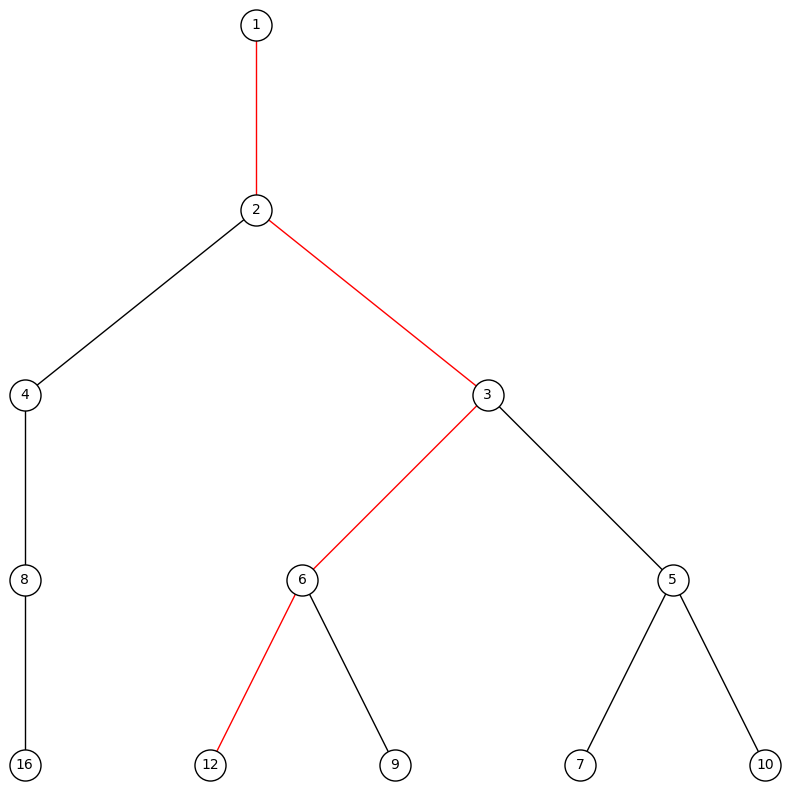

Sx is equal to Tree


In [11]:
do_test(12)

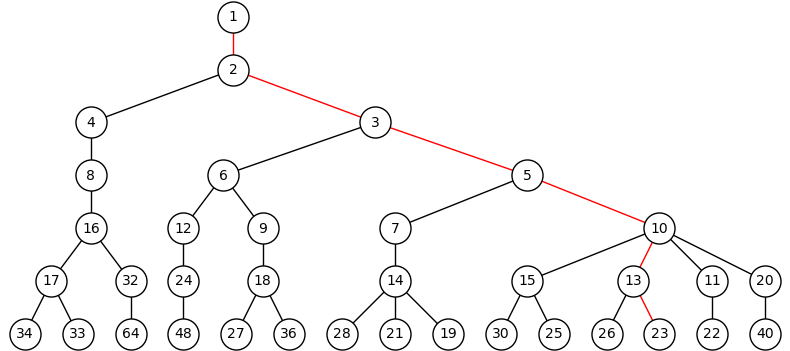

Tree is better than Sx


In [12]:
do_test(23)

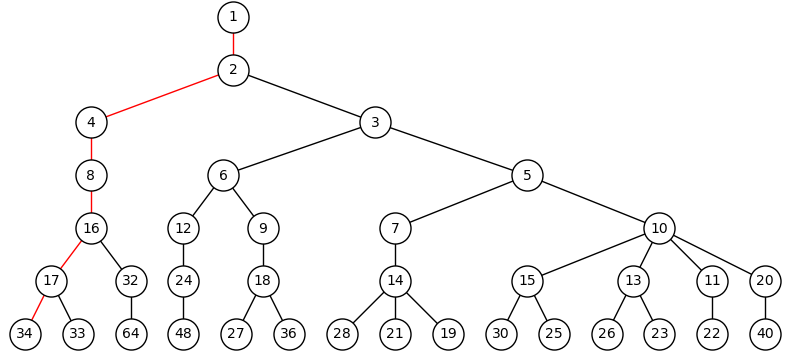

Sx is equal to Tree


In [13]:
do_test(34)

#### Вывод
Дерево степеней - это эффективный метод вычисления степеней чисел, поскольку он имеет количество операций, сравнимое или даже превосходящее метод Sx в некоторых случаях (например, при n=23). Таким образом, использование дерева степеней предпочтительнее, чем метод возведения в степень посредством операций обратного порядка. Описанная реализация дерева степеней демонстрирует это превосходство.

### 6. Дерево убывающих степеней 

Класс Дерева Убывающих Степенней с наследуется от класса Дерево Степенней.

Он содержит в себе метод $generate\_tree()$ - это метод, который формирует дерево степеней с помощью алгоритма поиска в ширину.

Внутри метода есть переменная $numberFound$, которая является флагом для прерывания цикла, если нужное число было найдено.

Далее инициализируются переменные $previousVertices$ и $currentVertices$ - это списки вершин предыдущего и текущего уровней дерева степеней.

Затем начинается основной цикл, который длится до тех пор, пока не будет найдено нужное число. Внутри цикла происходит формирования нового уровня дерева текущими вершинами. 

Для каждой вершины на текущем уровне находится кратчайший путь до вершины с номером $1$. Затем для каждой вершины на этом пути добавляется все последующие вершины, которых еще нет в дереве и необходимы для вычисления степени нужного числа.

Если вновь добавленная вершина равна искомой степени, то цикл прерывается.

В конце цикла переменная $previousVertices$ присваивает значение отсортированного списка вершин на текущем уровне, полученного в текущей итерации, в обратном порядке. Таким образом, при следующей итерации цикла текущие вершины станут предыдущими, а новые вершины будут формироваться относительно них.

In [14]:
class DescendingPowerTree(PowerTree):
    def _generate_tree(self):
        numberFound = False
        
        previousVertices = [1]
        while numberFound == False:
            currentVertices = []
            
            for item in previousVertices:
                path = self.tree.shortest_path(1, item)
                
                for vert in path:
                    currentVertice = item + vert
                
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        if currentVertice not in self.tree.vertices():
                            self.tree.add_vertex(currentVertice)
                            self.tree.add_edge(item, currentVertice)
                            currentVertices.append(currentVertice)

                            if currentVertice == self.power:
                                numberFound = True
            previousVertices = sorted(currentVertices)[::-1]

Для тестирования была написана функция. Данные тестирования: $12, 23, 34$

In [15]:
def do_test(n, showTree=True):
    tree = DescendingPowerTree(n)
    if showTree: tree.print_tree()
    tree.compare_with_sx(n, -1)

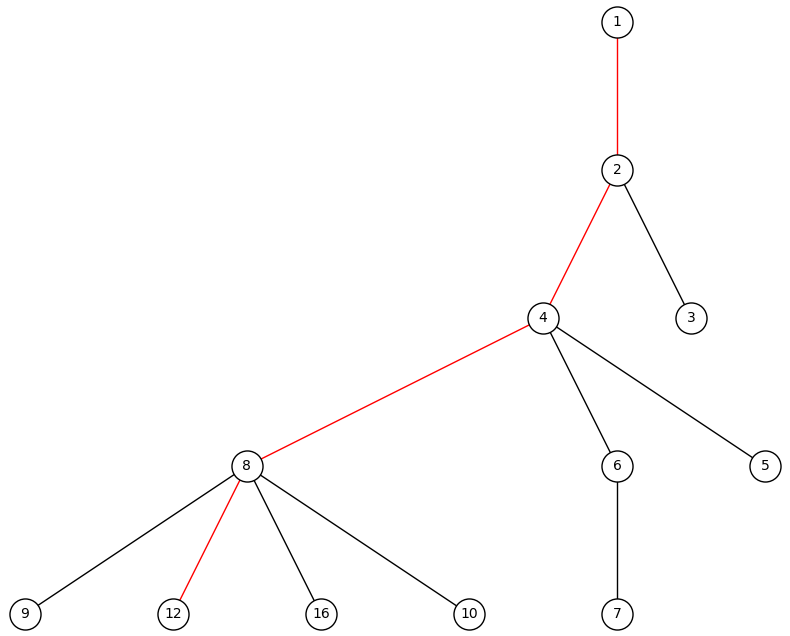

Sx is equal to Tree


In [16]:
do_test(12)

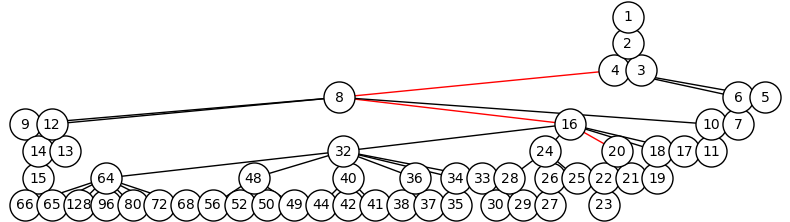

Sx is equal to Tree


In [17]:
do_test(23)

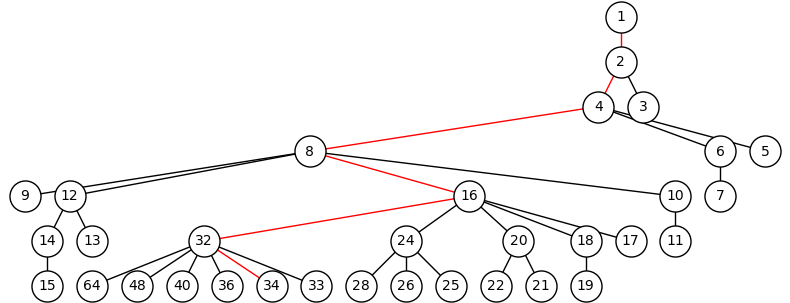

Sx is equal to Tree


In [18]:
do_test(34)

#### Вывод

Дерево убывающих степеней так же не уступают методу sx, однако в некоторых случаях классический метод Степенного Дерева дает меньшее число операций.

## Выводы

Освоены методы вычисления многочленов с использованием наименьшего количества операций и применен инструмент $SageMath$ для их реализации. Были изучены и протестированы алгоритмы, такие как бинарный метод $SX$, бинарный метод возведения в степень справа налево, метод множителей и алгоритм "дерева степеней". Выполнено сравнение результатов работы алгоритмов и их соответствие теоретическим положениям. Кроме того, было реализовано дерево убывающих степеней и проведено сравнение с бинарным методом $SX$.